In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import anndata as ad
import scanpy as sc

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as clr

import scvi
import squidpy as sq
import cellcharter as cc
import gc

c:\Users\Paula\miniconda3\envs\rapids\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Paula\miniconda3\envs\rapids\Lib\site-packages\docrep\decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
c:\Users\Paula\miniconda3\envs\rapids\Lib\site-packages\docrep\decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
c:\Users\Paula\miniconda3\envs\rapids\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and 

In [2]:
sc.settings.n_jobs = -1

In [3]:
import torch
torch.set_float32_matmul_precision('high')
torch.cuda.is_available()

True

In [4]:
from lightning.pytorch import seed_everything
seed_everything(12345)

Seed set to 12345


12345

In [5]:
import shapely as sp 
import geopandas as gpd
import libpysal as lps 
import esda
import alphashape as ash

In [6]:
neighborhood_colors = {
    "DEJ": "#0000FF",
    "PERIVASC-I": "#FF0000",
    "DIFF-IFE": "#00FF00",
    "PERIVASC-II": "#000033",
    "STROMA": "#FF00B6",
    "UPPER-HF": "#005300",
    "ECCRINE": "#FFD300",
    "SEB-GLND": "#009FFF",
    "SUBCUTIS": "#9A4D42",
    "LOWER-HF": "#00FFBE"
}

In [7]:
def get_boundary(coords):
    x = coords.get_coordinates().to_numpy()
    poly = lps.cg.alpha_shape_auto(x, step=1)
    return poly

In [8]:
adata = sc.read_h5ad("../../data/merfish/BAYSOR/seurat_objects/ns-atlas.merfish_baysor.scanvi_integrated.cellcharter.anndata.annotated.h5ad")

In [9]:
adata = adata[adata.obs['compartment.short'] != 'OUT'].copy()

In [10]:
adata.obs.head(10)

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,...,tissue_compartment,compartment.short,sample_compartment,donor_age,race_ethnicity,DV200,RIN,preservation_type,collection_type,component_id
1577244300000000000,1577244300000000000,NaN,413.582367,10833.988067,5659.833278,10830.405562,5656.014926,10838.326891,5662.925291,1.535899,...,dermis,DER,D151_SKIN_NS_S04_R01_DER,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N6_C0
1577244300000000001,1577244300000000001,NaN,954.476268,11088.754365,5967.087526,11081.775322,5960.465239,11095.173641,5971.335980,1.820862,...,dermis,DER,D151_SKIN_NS_S04_R01_DER,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N6_C0
1577244300000000002,1577244300000000002,NaN,2314.160266,9533.604246,6785.310602,9526.056136,6778.549632,9543.619093,6794.195938,1.315076,...,dermis,DER,D151_SKIN_NS_S04_R01_DER,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N0_C619
1577244300000000003,1577244300000000003,NaN,1377.588139,10330.515975,5700.319847,10320.137869,5693.969074,10343.894569,5705.211938,3.583034,...,dermis,DER,D151_SKIN_NS_S04_R01_DER,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N1_Cnan
1577244300000000006,1577244300000000006,NaN,364.332251,11125.854334,6012.214286,11122.113357,6009.566081,11131.581724,6014.614107,1.857338,...,dermis,DER,D151_SKIN_NS_S04_R01_DER,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N6_C0
1577244300000000008,1577244300000000008,NaN,1137.968435,10640.326353,7268.846994,10634.916613,7262.627689,10647.572479,7274.467481,1.099862,...,epidermis,EPI,D151_SKIN_NS_S04_R01_EPI,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N2_C2046
1577244300000000013,1577244300000000013,NaN,471.085336,11066.605192,5821.276310,11061.106763,5816.906358,11072.093556,5825.109851,1.461268,...,dermis,DER,D151_SKIN_NS_S04_R01_DER,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N6_C0
1577244300000000014,1577244300000000014,NaN,965.433572,10854.263308,5504.434883,10848.463487,5499.716736,10859.962040,5509.464750,1.076560,...,dermis,DER,D151_SKIN_NS_S04_R01_DER,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N6_C0
1577244300000000015,1577244300000000015,NaN,514.916523,9348.450583,5482.567898,9344.775658,5477.369742,9351.470938,5487.585487,1.468110,...,dermis,DER,D151_SKIN_NS_S04_R01_DER,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N6_C1
1577244300000000017,1577244300000000017,NaN,1179.214414,8472.042450,5949.888550,8467.573480,5941.958979,8477.315849,5958.837520,1.936929,...,epidermis,EPI,D151_SKIN_NS_S04_R01_EPI,36.0,NaN,0.52,NaN,FFPE,autopsy,D151_SKIN_NS_S04_R01_N2_C2046


In [11]:
test_sample = 'D165_SKIN_NS_S03_R01'

## Get Tissue Areas

In [12]:
metadf = adata.obs.copy()
metadf['cell_centroids'] = gpd.points_from_xy(metadf['center_x'], metadf['center_y'])
metadf = gpd.GeoDataFrame(metadf, geometry='cell_centroids')
tissue_areas = metadf.groupby(['sample_barcode'])['cell_centroids'].agg(lambda x: get_boundary(x)).reset_index()
tissue_areas = tissue_areas[~tissue_areas['cell_centroids'].is_empty].copy()
tissue_areas['tissue_area_mm2'] = (tissue_areas['cell_centroids'].area)/1e6

C:\Users\Paula\AppData\Local\Temp\ipykernel_21312\909125536.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tissue_areas = metadf.groupby(['sample_barcode'])['cell_centroids'].agg(lambda x: get_boundary(x)).reset_index()


In [13]:
tissue_areas.to_csv("../../data/merfish/BAYSOR/metadata/tissue_areas.csv", index=False)
tissue_areas.to_parquet("../../data/merfish/BAYSOR/metadata/tissue_areas.parquet", index=False)
tissue_areas.head(10)

,sample_barcode,cell_centroids,tissue_area_mm2
0,D004_SKIN_NS_S03_R01,"POLYGON ((320.136 4778.141, 290.763 4927.528, ...",40.287253
1,D011_SKIN_NS_S01_R01,"POLYGON ((4769.106 4744.027, 4789.048 4592.663...",17.058059
2,D018_SKIN_NS_S02_R01,"POLYGON ((1248.713 4253.491, 1518.393 4586.235...",27.450191
3,D018_SKIN_NS_S02_R02,"POLYGON ((6564.698 4987.553, 6577.782 4978.872...",27.260445
4,D028_SKIN_NS_S01_R02,"POLYGON ((1150.494 7464.692, 1188.024 7464.141...",6.765394
5,D028_SKIN_NS_S02_R02,"POLYGON ((5380.967 4226.02, 5411.456 4241.91, ...",4.502259
6,D028_SKIN_NS_S03_R02,"POLYGON ((13699.499 6371.505, 13699.144 6364.1...",8.858239
7,D028_SKIN_NS_S04_R02,"POLYGON ((14230.749 -1.353, 14219.685 -3.645, ...",4.368247
8,D042_SKIN_NS_S01_R01,"POLYGON ((4331.726 3385.531, 4323.55 3406.256,...",30.972962
9,D048_SKIN_NS_S01_R01,"POLYGON ((8154.977 8150.748, 8161.756 8165.848...",13.754031


## Neighborhood Connected Components

In [14]:
cc.gr.connected_components(adata, cluster_key='neighborhood', min_cells=10)
cc.tl.boundaries(adata, alpha_start=0.1, min_hole_area_ratio=0.001)

In [15]:
adata.obs['component_id'] = adata.obs['sample_barcode'].astype(str) + "_N" + adata.obs['cellcharter_cluster.k_10'].astype(str) + "_C" + adata.obs['component'].astype(str) 

In [16]:
cc.tl.linearity(adata)
cc.tl.curl(adata)
cc.tl.elongation(adata)
cc.tl.purity(adata, library_key='sample_barcode')

c:\Users\Paula\miniconda3\envs\rapids\Lib\site-packages\cellcharter\tl\_shape.py:429: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = adata[adata.obs[cluster_key] == cluster].obs[library_key][0]


In [17]:
shape_metrics = pd.DataFrame(adata.uns['shape_component'].copy())
shape_metrics['component'] = shape_metrics.index.values
shape_metrics['component_area'] = gpd.GeoSeries(shape_metrics['boundary']).area / (1e6) ## mm^2

shape_component_clusters = adata.obs[['neighborhood', 'component', 'sample_barcode', 'sample_id', 'batch', "anatomic_site", "donor_id"]].copy().drop_duplicates()
shape_component_clusters = shape_component_clusters[shape_component_clusters['component'].isna() == False]
shape_metrics_df = shape_component_clusters.merge(shape_metrics, on = "component")
shape_metrics_df = gpd.GeoDataFrame(shape_metrics_df, geometry = 'boundary')
del shape_component_clusters
gc.collect()

226580

In [18]:
shape_metrics_df.to_csv("../../data/merfish/BAYSOR/neighborhood_analysis/connected_component.metadata.csv", index=False)
shape_metrics_df.to_parquet("../../data/merfish/BAYSOR/connected_component.metadata.parquet", index=False)
shape_metrics_df.head(10)

,neighborhood,component,sample_barcode,sample_id,batch,anatomic_site,donor_id,boundary,linearity,curl,elongation,purity,component_area
0,ECCRINE,0,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((10604.54 5298.704, 10483.306 5422.21...",0.609451,0.069634,0.393136,0.992749,0.406227
1,DEJ,612,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((8532.181 6073.538, 8530.505 6092.045...",1.000000,0.304525,0.761435,0.866983,0.404996
2,DIFF-IFE,1998,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((8454.951 5963.788, 8458.319 6001.438...",1.000000,0.287970,0.736700,0.971264,0.188816
3,ECCRINE,1,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((9160.975 5573.047, 9137.895 5575.487...",0.488020,0.305112,0.116286,0.963415,0.031613
4,PERIVASC-II,2901,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((10535.565 6121.096, 10481.45 6168.72...",0.891150,0.032935,0.646999,0.990476,0.035142
5,PERIVASC-I,947,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((10282.34 6539.365, 10208.398 6645.10...",0.836276,0.137609,0.537905,0.855513,0.171964
6,PERIVASC-II,2902,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((9054.608 5531.909, 8957.665 5613.883...",0.856647,0.081900,0.599959,0.489691,0.211332
7,ECCRINE,2,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((10032.128 6954.351, 10021.515 6970.7...",0.645397,0.112673,0.427723,0.944444,0.004824
8,PERIVASC-II,2903,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((8621.64 6063.715, 8608.444 6081.16, ...",0.378589,0.345216,0.060785,0.648148,0.055247
9,ECCRINE,3,D151_SKIN_NS_S04_R01,202402221100_D151-1-6--fullrun--rerun--0222202...,MSSM_19,back,D151,"POLYGON ((11607.75 6000.737, 11607.03 6020.35,...",0.808292,0.024618,0.574685,1.000000,0.002805


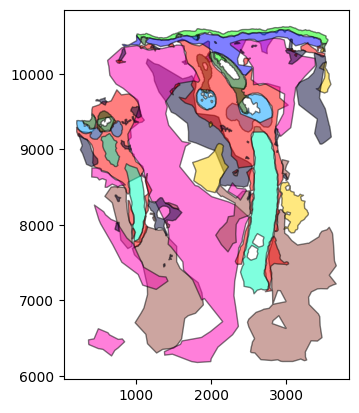

In [19]:
test_sample = shape_metrics_df[shape_metrics_df['sample_barcode'] == test_sample]
test_sample['boundary'].plot(color=test_sample['neighborhood'].map(neighborhood_colors), edgecolor='black', alpha=0.5, linewidth=1)
plt.show()
plt.close()

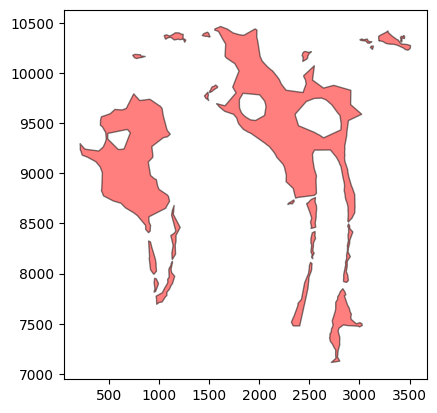

In [20]:
pvn = test_sample[test_sample['neighborhood'] == 'PERIVASC-I']
pvn['boundary'].plot(color=pvn['neighborhood'].map(neighborhood_colors), edgecolor='black', alpha=0.5, linewidth=1)
plt.show()
plt.close()

In [21]:
per_neighborhood = shape_metrics_df.groupby(['sample_barcode', 'neighborhood'])['boundary'].agg(lambda x: sp.MultiPolygon(x.tolist())).dropna().reset_index()
per_neighborhood = per_neighborhood[~per_neighborhood['boundary'].is_empty].copy()
per_neighborhood['neighborhood_area'] = (per_neighborhood.area)/1e6
per_neighborhood['neighborhood_proportion'] = per_neighborhood['neighborhood_area'] / per_neighborhood['neighborhood_area'].sum()
per_neighborhood = per_neighborhood.merge(tissue_areas[['sample_barcode', 'tissue_area_mm2']], on = 'sample_barcode')
per_neighborhood['neighborhood_area_adjusted'] = per_neighborhood['tissue_area_mm2'] * per_neighborhood['neighborhood_proportion']
gc.collect()

C:\Users\Paula\AppData\Local\Temp\ipykernel_21312\587306947.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per_neighborhood = shape_metrics_df.groupby(['sample_barcode', 'neighborhood'])['boundary'].agg(lambda x: sp.MultiPolygon(x.tolist())).dropna().reset_index()


3412

In [22]:
per_neighborhood.to_parquet("../../data/merfish/BAYSOR/neighborhood_analysis/neighborhood.metadata.parquet")
per_neighborhood.to_csv("../../data/merfish/BAYSOR/neighborhood_analysis/neighborhood.metadata.csv")

In [23]:
per_neighborhood.head(10)

,sample_barcode,neighborhood,boundary,neighborhood_area,neighborhood_proportion,tissue_area_mm2,neighborhood_area_adjusted
0,D004_SKIN_NS_S03_R01,DEJ,"MULTIPOLYGON (((515.389 7345.138, 503.137 7365...",0.705217,0.000868,40.287253,0.034971
1,D004_SKIN_NS_S03_R01,PERIVASC-I,"MULTIPOLYGON (((1160.242 4055.619, 1185.468 40...",9.228327,0.011359,40.287253,0.457625
2,D004_SKIN_NS_S03_R01,DIFF-IFE,"MULTIPOLYGON (((277.096 5096.869, 255.442 5220...",0.373533,0.000460,40.287253,0.018523
3,D004_SKIN_NS_S03_R01,PERIVASC-II,"MULTIPOLYGON (((1574.458 7349.091, 1555.913 73...",1.450425,0.001785,40.287253,0.071925
4,D004_SKIN_NS_S03_R01,STROMA,"MULTIPOLYGON (((659.693 7402.592, 624.687 7411...",2.719946,0.003348,40.287253,0.134880
5,D004_SKIN_NS_S03_R01,UPPER-HF,"MULTIPOLYGON (((2058.627 9216.306, 2067.874 92...",1.891803,0.002329,40.287253,0.093813
6,D004_SKIN_NS_S03_R01,ECCRINE,"MULTIPOLYGON (((1115.167 7528.574, 1124.21 753...",1.285831,0.001583,40.287253,0.063763
7,D004_SKIN_NS_S03_R01,SEB-GLND,"MULTIPOLYGON (((3066.559 9103.501, 3064.399 91...",2.051175,0.002525,40.287253,0.101716
8,D004_SKIN_NS_S03_R01,SUBCUTIS,"MULTIPOLYGON (((2035.329 5526.31, 2275.392 534...",16.213236,0.019957,40.287253,0.804000
9,D004_SKIN_NS_S03_R01,LOWER-HF,"MULTIPOLYGON (((1981.932 1694.86, 1997.289 170...",0.218321,0.000269,40.287253,0.010826


In [24]:
del adata.uns['shape_component']

In [25]:
adata.obs.to_csv("../../data/merfish/BAYSOR/metadata/ns-atlas.merfish_baysor.scanvi_integrated.cellcharter.annotated.cell_metadata.filtered.csv")